In [81]:
import pandas as pd
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Data
* Kaggle : https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor
* Data is scraped from Glassdor using Selenium
* Note: -1 value in any column means either the information was not available or selenium was not able to scrap it. You can remove or replace the -1 value however you like.

In [49]:
df = pd.read_csv('Data/ds_salary_data.csv')

In [50]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


## Data Clean

In [51]:
df = df.drop("index",axis=1)

In [53]:
df.duplicated().sum()

275

In [54]:
df = df.drop_duplicates().reset_index(drop=True)

In [55]:
df.duplicated().sum()

0

In [56]:
#Let's add the salary in GBP£
df["Avg Salary(£K)"] = df["Avg Salary(K)"]*0.73

In [57]:
#Sort df by average salary so we don't need to do it every time
df = df.sort_values("Avg Salary(£K)", ascending = False)

In [58]:
cols_to_keep = ["Job Title","job_title_sim","Job Description","Avg Salary(£K)","Size","Sector","Location","Headquarters","Rating"]

In [59]:
df[cols_to_keep].head(10)

,Job Title,job_title_sim,Job Description,Avg Salary(£K),Size,Sector,Location,Headquarters,Rating
280,"Director II, Data Science - GRM Actuarial",data scientist,Advance your career at Liberty Mutual Insuranc...,185.420,10000+,Insurance,"Chicago, IL","Boston, MA",3.3
97,Senior Data Scientist,data scientist,Who we want:\nAre you committed to using your ...,173.375,1001 - 5000,Business Services,"Washington, DC","Washington, DC",4.2
343,Principal Machine Learning Scientist,machine learning engineer,"Today, nearly every business in the world has ...",169.725,501 - 1000,Information Technology,"San Francisco, CA","San Jose, CA",4.7
164,Principal Data Scientist with over 10 years ex...,data scientist,Position Title: Principal Data Scientist\nLoca...,164.250,51 - 200,Information Technology,"San Francisco, CA","Fremont, CA",-1.0
432,Data Science Manager,data scientist,About us:\nGrand Rounds is a new kind of healt...,161.695,501 - 1000,Health Care,"San Francisco, CA","San Francisco, CA",4.2
183,Lead Data Engineer,data engineer,Credit Sesame is bringing cash and credit toge...,149.650,51 - 200,Information Technology,"Mountain View, CA","Mountain View, CA",4.1
329,"Director II, Data Science - GRS Predictive Ana...",data scientist,Advance your career at Liberty Mutual Insuranc...,141.985,10000+,Insurance,"Chicago, IL","Boston, MA",3.3
386,Principal Data Scientist,data scientist,Position Overview\n\nThe Climate Corporation i...,141.620,501 - 1000,Information Technology,"San Francisco, CA","San Francisco, CA",3.2
44,Lead Data Scientist,data scientist,As the world's leader in digital payments tech...,134.685,10000+,Information Technology,"Bellevue, WA","Foster City, CA",3.7
181,Staff Machine Learning Engineer,machine learning engineer,Join the Mobile Future with Tapjoy\n\nData Sci...,132.130,201 - 500,Information Technology,"San Francisco, CA","San Francisco, CA",3.9


## EDA

Sector
* Which sectors have the most jobs?
* Which sectors have the highest rating on average?

Location
* Where are the majority of jobs located?

Correlation
* Are any of the variables correlated?

Use Case
* Which jobs are looking for my skillset?

### Sector

In [60]:
#Number of unique sectors
df.Sector.nunique()

25

In [61]:
#Count of jobs per sector
df.groupby('Sector')['Job Title'].count().sort_values(ascending=False)

Sector
Information Technology                124
Business Services                      70
Biotech & Pharmaceuticals              62
Insurance                              41
Health Care                            25
Finance                                25
Aerospace & Defense                    20
Manufacturing                          18
Education                              14
Retail                                  8
Oil, Gas, Energy & Utilities            8
Non-Profit                              7
-1                                      7
Government                              7
Media                                   5
Real Estate                             5
Travel & Tourism                        5
Transportation & Logistics              4
Consumer Services                       3
Telecommunications                      3
Mining & Metals                         2
Accounting & Legal                      1
Construction, Repair & Maintenance      1
Arts, Entertainment & Recre

In [62]:
df.groupby("Sector")["Rating"].mean().sort_values(ascending=False)

Sector
Agriculture & Forestry                4.600000
Aerospace & Defense                   4.035000
Accounting & Legal                    4.000000
Real Estate                           3.980000
Transportation & Logistics            3.950000
Information Technology                3.931452
Oil, Gas, Energy & Utilities          3.837500
Business Services                     3.834286
Non-Profit                            3.828571
Travel & Tourism                      3.780000
Consumer Services                     3.766667
Finance                               3.752000
Mining & Metals                       3.750000
Telecommunications                    3.666667
Arts, Entertainment & Recreation      3.600000
Insurance                             3.560976
Biotech & Pharmaceuticals             3.524194
Health Care                           3.456000
Media                                 3.360000
Construction, Repair & Maintenance    3.300000
Government                            3.285714
Manufa

In [64]:
df.groupby('Sector')["Avg Salary(£K)"].mean().sort_values(ascending=False)

Sector
Media                                 85.702000
Biotech & Pharmaceuticals             83.220000
Accounting & Legal                    82.855000
-1                                    82.020714
Information Technology                80.629677
Retail                                76.467500
Real Estate                           75.482000
Education                             74.851071
Mining & Metals                       74.825000
Telecommunications                    74.703333
Insurance                             74.308659
Consumer Services                     73.486667
Aerospace & Defense                   72.470750
Finance                               72.007200
Transportation & Logistics            69.897500
Business Services                     69.688929
Manufacturing                         62.942222
Health Care                           61.436800
Government                            59.182143
Oil, Gas, Energy & Utilities          58.947500
Agriculture & Forestry           

In [88]:
df[df.Sector == 'Media']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Avg Salary(£K)
15,Data Engineer I,$102K-$190K (Glassdoor est.),This opportunity is within Audibles Data Engin...,3.6,Audible\n3.6,"Newark, NJ","Newark, NJ",1001 - 5000,1995,Subsidiary or Business Segment,Motion Picture Production & Distribution,Media,Unknown / Non-Applicable,-1,0,0,102,190,146.0,Audible,NJ,26,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data engineer,na,na,106.580
349,Data Scientist,$94K-$162K (Glassdoor est.),REF#: 36469\n\nCBS BUSINESS UNIT: CBS Interact...,3.5,CBS Interactive\n3.5,"New York, NY","San Francisco, CA",1001 - 5000,1992,Subsidiary or Business Segment,TV Broadcast & Cable Networks,Media,$500 million to $1 billion (USD),"NBCUniversal, Comcast, Netflix",0,0,94,162,128.0,CBS Interactive,NY,29,1,1,0,0,1,0,1,0,1,1,1,1,0,0,1,1,data scientist,na,na,93.440
390,Data Engineer,$79K-$147K (Glassdoor est.),WHO WE ARE\n\nNCSOFT® established in 1997 and ...,3.1,NCSOFT\n3.1,"Aliso Viejo, CA","Seoul, South Korea",1001 - 5000,1997,Company - Public,Video Games,Media,$10+ billion (USD),"Blizzard Entertainment, Riot Games, Electronic...",0,0,79,147,113.0,NCSOFT,CA,24,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,data engineer,na,na,82.490
113,Data Scientist,$80K-$135K (Glassdoor est.),E.W. Scripps is a company rich in media histor...,3.5,The E.W. Scripps Company\n3.5,"Cincinnati, OH","Cincinnati, OH",1001 - 5000,1878,Company - Public,TV Broadcast & Cable Networks,Media,$500 million to $1 billion (USD),-1,0,0,80,135,107.5,The E.W. Scripps Company,OH,143,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,data scientist,na,M,78.475
200,Data Analyst,$65K-$120K (Glassdoor est.),"NCSOFT is focused on making high-quality, cutt...",3.1,NCSOFT\n3.1,"San Mateo, CA","Seoul, South Korea",1001 - 5000,1997,Company - Public,Video Games,Media,$10+ billion (USD),"Blizzard Entertainment, Riot Games, Electronic...",0,0,65,120,92.5,NCSOFT,CA,24,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,analyst,na,na,67.525


### Location

In [65]:
df.groupby('Location')["Job Title"].count().sort_values(ascending=False)[:20]

Location
New York, NY               37
San Francisco, CA          34
Cambridge, MA              28
Chicago, IL                18
Boston, MA                 13
Washington, DC              9
San Jose, CA                8
Herndon, VA                 7
Indianapolis, IN            6
Pittsburgh, PA              6
Richland, WA                6
Palo Alto, CA               5
Austin, TX                  5
South San Francisco, CA     5
Rockville, MD               5
San Diego, CA               5
Mountain View, CA           5
Seattle, WA                 4
Gaithersburg, MD            4
Chantilly, VA               4
Name: Job Title, dtype: int64

In [66]:
df.groupby('Location')["Avg Salary(£K)"].mean().sort_values(ascending=False)[:20]

Location
Bellevue, WA         134.685000
Lake Forest, IL      131.035000
Mountain View, CA    124.684000
Novato, CA           122.640000
Burbank, CA          119.720000
Emeryville, CA       111.690000
Newark, NJ           106.580000
Jersey City, NJ      105.667500
Brisbane, CA         104.755000
Saint Louis, MO      104.755000
Cupertino, CA        103.660000
San Jose, CA         101.971875
Foster City, CA      101.835000
Natick, MA           101.835000
Plano, TX            101.470000
Fort Lee, NJ         100.557500
Santa Clara, CA       97.820000
San Francisco, CA     97.701912
Arvada, CO            97.455000
Marlborough, MA       96.846667
Name: Avg Salary(£K), dtype: float64

In [ ]:
df.groupby('Location')["Avg Salary(£K)"].mean().sort_values(ascending=False)[-20:]

### Correlation

In [84]:
mask = np.triu(df.corr())

<AxesSubplot:>

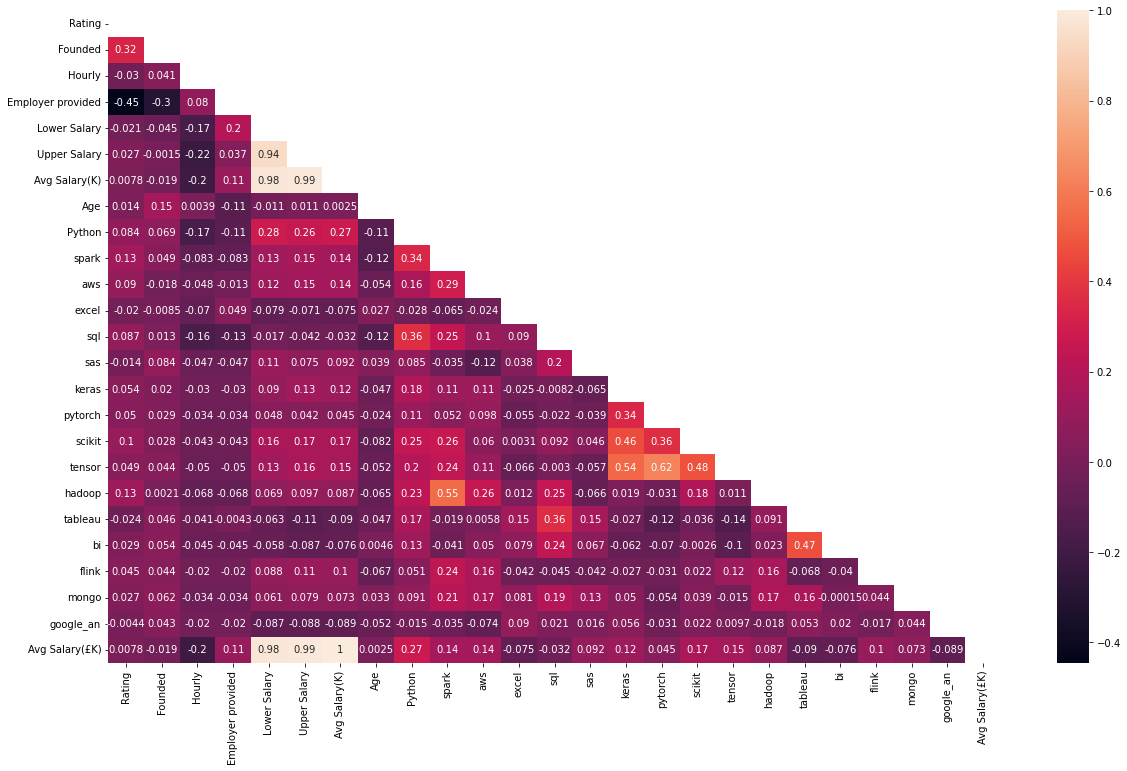

In [85]:
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(df.corr(),annot=True, mask=mask)

#pytorch and tensor generally paired together. Similarly spark & hadoop
#No particular variable correlates with average salary (other than different salary variables)

## Use Case
* Filter jobs appropriate to my skills & salary expectations

In [21]:
my_skills = df[(df.Python == 1) & (df.bi == 1)][cols_to_keep]

In [22]:
my_skills[(my_skills["Avg Salary(£K)"] > 60) & (my_skills.Rating > 3.5)][cols_to_keep]

,Job Title,job_title_sim,Job Description,Avg Salary(£K),Size,Sector,Location,Headquarters,Rating
395,Data Science Engineer - Mobile,data scientist,Mobile is a top strategic priority for Adobe. ...,118.260,10000+,Information Technology,"San Jose, CA","San Jose, CA",4.0
335,Director Data Science,data scientist,We’re looking for a director to drive our data...,117.895,1001 - 5000,Business Services,"Fort Lee, NJ","Fort Lee, NJ",3.6
278,Senior Data Scientist,data scientist,"The Infrastructure, Architecture, and Tools te...",101.835,1001 - 5000,Information Technology,"Natick, MA","Natick, MA",4.4
42,Senior Data Scientist,data scientist,"Working for Equity Residential (EQR), a leadin...",94.900,1001 - 5000,Real Estate,"Chicago, IL","Chicago, IL",4.3
296,"Enterprise Architect, Data",na,The MassMutual Data Science team in the Enterp...,94.535,5001 - 10000,Insurance,"Boston, MA","Springfield, MA",3.6
454,Data Scientist,data scientist,We’re looking for a data scientist to drive ou...,83.220,1001 - 5000,Business Services,"Fort Lee, NJ","Fort Lee, NJ",3.6
56,Senior Data Scientist,data scientist,Overview\n\n\nEveryone wants to work with peop...,78.110,201 - 500,Mining & Metals,"Cincinnati, OH","Cincinnati, OH",4.4
399,"Sr Expert Data Science, Advanced Visual Analyt...",data scientist,"Posting Title\nSr Expert Data Science, Advance...",77.745,10000+,Biotech & Pharmaceuticals,"Cambridge, MA","Basel, Switzerland",3.8
33,Web Data Analyst,analyst,We are looking for a Web Data Analyst to assis...,77.380,201 - 500,Information Technology,"San Jose, CA","Chicago, IL",4.2
459,Data Scientist (Warehouse Automation),data scientist,"SoftBank Robotics, the global leader in workfo...",75.190,201 - 500,Manufacturing,"San Francisco, CA","Paris, France",3.8


### Conclusions
* 24 sectors, of which IT and business services have the most open roles
* Agriculture & Forestry and Aeorspace & Defense are the sectors with the highest Glassdoor ratings
* The Media sector has the highest average salary
* The most jobs are in New York, NY followed by San Francisco, CA
* Bellevue, WA has the highest average salary
* Jobs which ask for Spark will commonly also ask for Hadoop
* Jobs which ask for PyTorch will generally ask for Tensor

### Out of Scope
* Creating visualisations / dashboard for EDA sections
* Scrape data for UK jobs from Glassdoor 
* Set up email alerts for jobs which are relevant to me
* Run on an 'always on' server: eg. Raspberry Pi and run at regular intervals